## Step-1:Data preprocessing step

1.Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.Import the dataset using pandas library

In [2]:
data=pd.read_csv("Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


3.Extracting the independent and dependent variable

In [3]:
#for independent variable
x=data.iloc[:,1:2]
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [4]:
#for dependent variable
y=data.iloc[:,2]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

4.checking the missing values

In [5]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

There is no any missing values found in the dataset

## Step-2:Building the Linear Regression model:

In [6]:
#import the linear regression class from the scikit-learn library
from sklearn.linear_model import LinearRegression

#create an instance of linear regression
regressor=LinearRegression()

#fitting the data in the instance
regressor.fit(x,y)

LinearRegression()

## Step-3:Building the Polynomial Regression model

In [7]:
#import the polynomial features class from the scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

#create the instance for the polynomial features
poly_features=PolynomialFeatures(degree=4)

#fitting the data into instance
x_poly=poly_features.fit_transform(x)

#print it
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [8]:
#create another instance of linear regression
regressor1=LinearRegression()

#put the newly formed polynomial feature matrix(x_poly)
regressor1.fit(x_poly,y)

LinearRegression()

## Step-4:Visualizing the result for linear regression

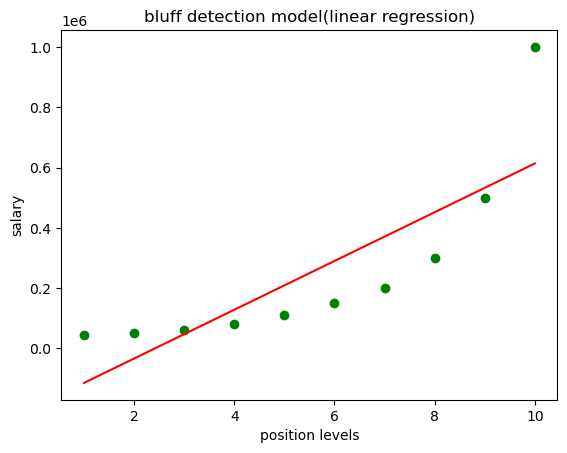

In [9]:
#forming the scatter plot
plt.scatter(x,y,color='green')

#linear regression line
plt.plot(x,regressor.predict(x),color='red')

#title of plot
plt.title("bluff detection model(linear regression)")

#xlabel
plt.xlabel("position levels")

#ylabel
plt.ylabel("salary")

#show
plt.show()

## Step-5:Visualizing the result for Polynomial regression

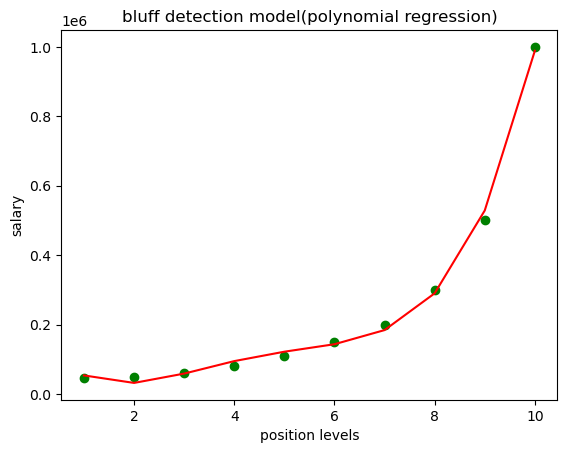

In [10]:
#plot using scatter plot
plt.scatter(x,y,color='green')

#plot
plt.plot(x,regressor1.predict(x_poly),color='red')

#title
plt.title("bluff detection model(polynomial regression)")

#xlabel
plt.xlabel("position levels")

#ylabel
plt.ylabel("salary")

#show
plt.show()

## Step-5:Predicting the final result with the polynomial regression model


In [11]:
#create the object for linear regression 
lin_pred=regressor.predict([[6.5]])

#print
print(lin_pred)

[330378.78787879]


C:\Users\hp\anaconda3\anaconda\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Here the salary of the employee is'330378.78787879' according to the linear regression

## Step-6: Predicting the final result with the polynomial regression model:

In [13]:
#create the object to predict the salary according to the polynomial model
poly_predict=regressor1.predict(poly_features.fit_transform([[6.5]]))

#print the result
print(poly_predict)

[158862.45265153]


In [ ]:
Here the salary of the employee is'158862.45265153' according to the polynomial regression model.

## Step-7:Predicting the r2_score score

In [14]:
#import the r2_score class from the scikit-learn library
from sklearn.metrics import r2_score

In [15]:
#for polynomial regression model
print(r2_score(y,regressor1.predict(x_poly)))

0.9973922891706614


## Here is the result for polynomial regression model that is 99% Accuracy